In [60]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


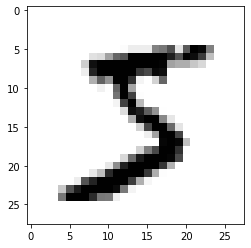

Label of the training data[0]: 5


In [43]:
##load the mnist dataset
mnist = tf.keras.datasets.mnist  # 0-9 hand-written digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(np.shape(x_train));
print(np.shape(y_train));
print(np.shape(x_test));
print(np.shape(y_test));
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print('Label of the training data[0]:', y_train[0])

In [44]:
##reshape the train and test data into a vector
train_data = len(x_train)*[len(x_train[0])*len(x_train[0])*[0]];
for i in range(len(x_train)):
    train_data[i] = np.reshape(x_train[i], -1);

test_data = len(x_test)*[len(x_test[0])*len(x_test[0])*[0]];
for i in range(len(x_test)):
    test_data[i] = np.reshape(x_test[i], -1);
    
print(np.shape(train_data));
print(np.shape(train_data));

(60000, 784)
(60000, 784)


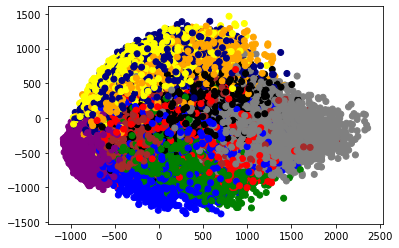

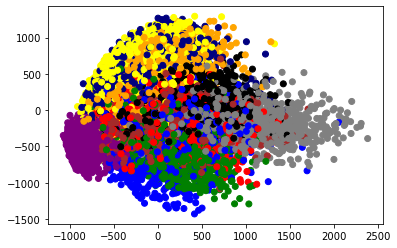

In [45]:
##PCA
# preprocessing.scale(train_data);
pca = PCA(n_components = 2);
pca.fit(train_data);
train_data_pca = pca.transform(train_data);
test_data_pca = pca.transform(test_data);


colormap = np.array(['Grey', 'Purple', 'Blue', 'Green', 'Orange', 'Red',
                      'Black','Yellow', 'Brown', 'Navy']);
plt.scatter(train_data_pca[:,0], train_data_pca[:,1], c=colormap[y_train])  ##plot the PCA training data
plt.show()
plt.scatter(test_data_pca[:,0], test_data_pca[:,1], c=colormap[y_test])  ##plot the PCA testing data
plt.show()

In [67]:
##LDA(Reduce to dimension of class-1)
lda = LinearDiscriminantAnalysis(n_components=9)
lda.fit(train_data,y_train);
train_data_lda = lda.transform(train_data);
test_data_lda = lda.transform(test_data);
print(np.shape(train_data_lda));
print(np.shape(test_data_lda));


(60000, 9)
(10000, 9)


Logistic Regression prediction: 0 True value: 0


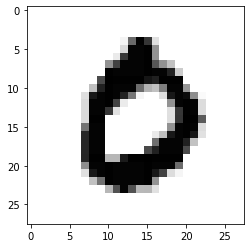

Score for PCA data: 0.4464


In [70]:
##apply Logistic Regression for PCA data
logisticRegr = LogisticRegression(solver = 'newton-cg')
logisticRegr.fit(train_data_pca, y_train);
pca_predict = logisticRegr.predict(test_data_pca);
print('Logistic Regression prediction:',pca_predict[3], 'True label:', y_test[3]);
plt.imshow(x_test[3], cmap = plt.cm.binary)
plt.show()
print('Score for PCA data:', logisticRegr.score(test_data_pca, y_test));

Logistic Regression predictionL: 1 True value: 1


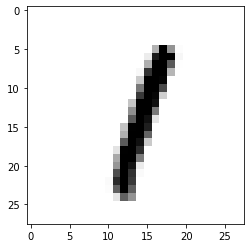

Score of LDA data: 0.8867


In [72]:
##apply Logistic Regression for LDA data
logisticRegr = LogisticRegression(solver = 'newton-cg')
logisticRegr.fit(train_data_lda, y_train);
lda_predict = logisticRegr.predict(test_data_lda);
print('Logistic Regression predictionL:', lda_predict[5], 'True value:', y_test[5]);
plt.imshow(x_test[5], cmap = plt.cm.binary)
plt.show()
print('Score of LDA data:', logisticRegr.score(test_data_lda, y_test));